<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/ode/Week_11_solvebvp_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2022**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

# solve_bvp demo
Will do the same problems as before using *scipy.integrate.solve_bvp*



```
scipy.integrate.solve_bvp(fun, bc, x, y, p=None)
```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html



# EXAMPLE 1 - 1D projectile motion

y(t) = height of ball at time t

y'' = -g

## CASE 1:  y(0)=0, y(2)=10
What initial speed does the ball have so that it is 10 m above the ground 2 seconds later?

In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], -9.8*np.ones_like(x)))

def bc(ya,yb): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y[2]=10   (ya is y at t=0, yb is y at tf)
  return np.array([ya[0], yb[0]-10])

# Initial values
TMAX = 2
x = np.linspace(0,2,6)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)

sol = solve_bvp(fun, bc, x, y0)
print(sol)

       message: 'The algorithm converged to the desired accuracy.'
         niter: 1
             p: None
 rms_residuals: array([1.79962121e-16, 1.73175144e-16, 1.15365450e-16, 0.00000000e+00,
       1.18309373e-15])
           sol: <scipy.interpolate.interpolate.PPoly object at 0x7f8da7117770>
        status: 0
       success: True
             x: array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])
             y: array([[ 1.33226763e-15,  5.13600000e+00,  8.70400000e+00,
         1.07040000e+01,  1.11360000e+01,  1.00000000e+01],
       [ 1.48000000e+01,  1.08800000e+01,  6.96000000e+00,
         3.04000000e+00, -8.80000000e-01, -4.80000000e+00]])
            yp: array([[14.8 , 10.88,  6.96,  3.04, -0.88, -4.8 ],
       [-9.8 , -9.8 , -9.8 , -9.8 , -9.8 , -9.8 ]])


solve_bvp returns final y values, but it also gives a spline interpolation

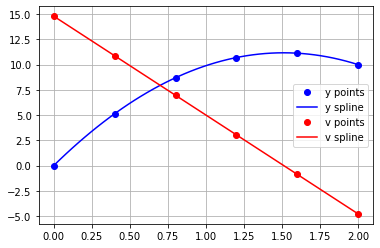

In [ ]:
# Look at points
t = x
y = sol.y[0]
v = sol.y[1]

# Spline Interpolation
ts = np.linspace(0,TMAX, 50)  # points to interpolate
spl = sol.sol(ts)  # splines with shape (n,m)
ys = spl[0]
vs = spl[1]

plt.plot(t,y,'bo', label='y points')
plt.plot(ts,ys,'b-', label='y spline')
plt.plot(t,v,'ro',label='v points')
plt.plot(ts,vs,'r-',label='v spline')
plt.legend()
plt.grid()
plt.show()

Yes indeed, we ended up at y(2)=10

## CASE 2: y(0)=0, y'(2)=5

We'll do the problem in a single cell this time

The algorithm converged to the desired accuracy.


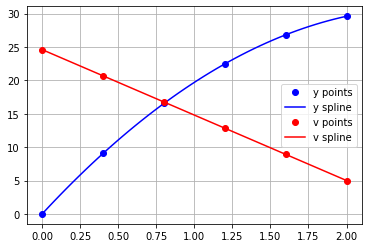

In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], -9.8*np.ones_like(x)))

def bc(ya,yb): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y'[2]=5   (ya is y at t=0, yb is y at tf)
  return np.array([ya[0], yb[1]-5])

# Initial values
TMAX = 2
x = np.linspace(0,2,6)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)

sol = solve_bvp(fun, bc, x, y0)
print(sol.message)

# Look at points
t = sol.x
y = sol.y[0]
v = sol.y[1]

# Spline Interpolation
ts = np.linspace(0,TMAX, 50)  # points to interpolate
spl = sol.sol(ts)  # splines with shape (n,m)
ys = spl[0]
vs = spl[1]

plt.plot(t,y,'bo', label='y points')
plt.plot(ts,ys,'b-', label='y spline')
plt.plot(t,v,'ro',label='v points')
plt.plot(ts,vs,'r-',label='v spline')
plt.legend()
plt.grid()
plt.show()

## Parameterized Version
Try explicitly defining an initial speed $v_0$ and getting solve_bvp to evaluate it directly.  

For every parameter we also have to define a new boundary condition.  We set $ya' = v_0$.



In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y,p):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], -9.8*np.ones_like(x)))

def bc(ya,yb,p): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y'[2]=5   (ya is y at t=0, yb is y at tf)
  ## Need new BC for each param, set ya'=v0
  return np.array([ya[0], yb[1]-5, ya[1]-p[0]])

# Initial values
TMAX = 2
x = np.linspace(0,2,6)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)
p0 = [0]  # initial parameter guess

sol = solve_bvp(fun, bc, x, y0, p0)
print(sol.message)
print('Found parameter v0 =',sol.p[0])

The algorithm converged to the desired accuracy.
Found parameter v0 = 24.6


# EXAMPLE 8.2
y'' = 4t - 4y with BC y(0)=0 and y'(2)=0

The algorithm converged to the desired accuracy.


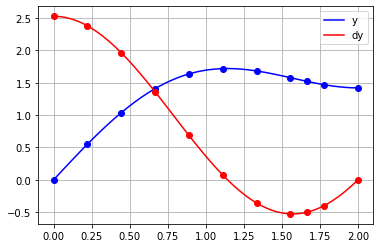

In [ ]:
# Definitions:
# x = 1D array with shape (m)
# y = 2D array with shape (n,m) for n equations

# Define y=[y0, y1] so n=2 with y0=y(t), y1=y0'
def fun(x,y):  # derivative function, returns y' with shape (n,m)
  return np.vstack((y[1], 4*x - 4*y[0]))

def bc(ya,yb): # BC residuals for y at both endpoints, returns shape (n)
  # BC: y[0]=0,  y'[2]=5   (ya is y at t=0, yb is y at tf)
  return np.array([ya[0], yb[1]-0])

# Initial values
TMAX = 2
x = np.linspace(0,2,10)
y0 = np.zeros((2,x.size))  # initial guess:  y is shape (n,m)

sol = solve_bvp(fun, bc, x, y0)
print(sol.message)

# Look at points
t = sol.x
y = sol.y[0]
v = sol.y[1]

# Spline Interpolation
ts = np.linspace(0,TMAX, 50)  # points to interpolate
spl = sol.sol(ts)  # splines with shape (n,m)
ys = spl[0]
vs = spl[1]

plt.plot(t,y,'bo')
plt.plot(ts,ys,'b-', label='y')
plt.plot(t,v,'ro')
plt.plot(ts,vs,'r-',label='dy')
plt.legend()
plt.grid()
plt.show()

# Quantum Mechanics
Solving the Schrodinger Equation for the infinite square well potential.

Inside the well $V=0$ so we get $\psi''=-(2mE/\hbar^2) \psi$

Here I will set up $E$ as a unknown parameter for solve_bvp to find for us.  Note that this requires a new BC.  A good choice is to specify that $\psi'(0)$ is non-zero to keep the solution from collapsing to $\psi=0$ everywhere.  Knowing the right answer that $\psi ∝ \sin(kx) $ and $\psi' \propto k \cos(kx)$ we set $\psi'(0)=k$.  


Solved in 3 iterations, number of nodes 13. 
Maximum relative residual: 8.96e-04 
Maximum boundary residual: 3.58e-09
The wavefunction at x=L is  0.0
Energy is = 37.479726271401795


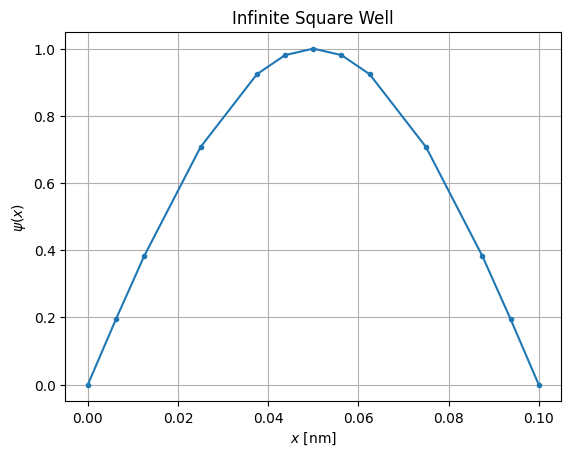

In [ ]:
# Attempt to solve for energy
Eguess = 26  # energy [eV]
L = 0.1  # width [nm]

# Constants - all energies in eV, lengths in nm
hbarc = 197  # hbar * c [eV nm]
mc2 = 511000 # electron mass energy [eV]

def ISW_BVP(x, y, p):
    E = p[0]
    k2 = 2*mc2*E/(hbarc**2)
    return np.vstack((y[1], -k2*y[0]))

def bc(ya, yb, p):
    E = p[0]
    k = (2*mc2*E)**0.5/hbarc   #
    return np.array([ya[0], yb[0], ya[1] - k])

M = 5 # number of mesh points in x
x = np.linspace(0, L, M)
#y[0, 1] = 1  # can't start with all zeros or solution is zero everywhere
y = np.ones((2, M))

sol = solve_bvp(ISW_BVP, bc, x, y, p=[Eguess], tol=1e-3,verbose=1)
#print(sol)
print("The wavefunction at x=L is ",sol.y[0,-1])
print('Energy is =',sol.p[0])

plt.figure()
plt.plot(sol.x, sol.y[0],'.-')
plt.title('Infinite Square Well')
plt.xlabel('$x$ [nm]')
plt.ylabel('$\psi(x)$')

plt.grid()
plt.show()


In [ ]:
n=1
exact = (hbarc*2*np.pi*n)**2 / (8*mc2*L**2)
print('Energy Values:')
print('bvp\t',sol.p[0])
print('Exact\t', exact)

Energy Values:
bvp	 37.479726271401795
Exact	 37.47842242679812


## Other Solutions
Try for n=2

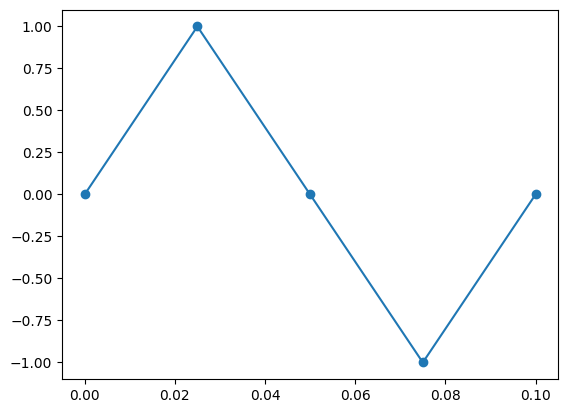

In [ ]:
y0 = np.array([0,1,0,-1,0])
yp0 = np.gradient(y0)
plt.plot(x, y0, 'o-')

Solved in 4 iterations, number of nodes 25. 
Maximum relative residual: 9.15e-04 
Maximum boundary residual: 7.19e-09
The wavefunction at x=L is  0.0
Energy is = 149.9189050855465


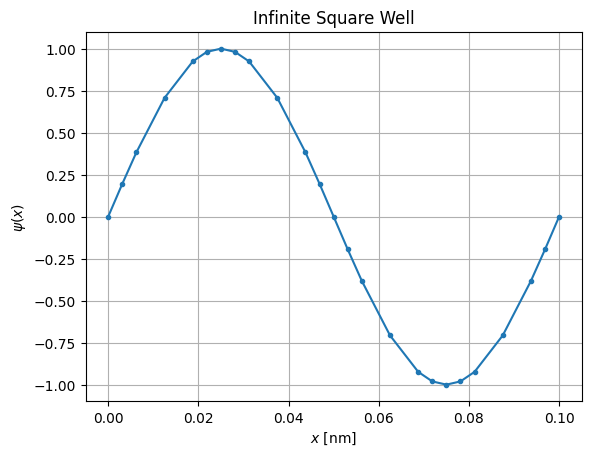

In [ ]:
Eguess = 150  # energy [eV]
M = 5 # number of mesh points in x
x = np.linspace(0, L, M)
y0 = np.array([0,1,0,-1,0])
yp0 = np.gradient(y0)
y = np.vstack((y0, yp0))

sol = solve_bvp(ISW_BVP, bc, x, y, p=[Eguess], tol=1e-3,verbose=1)
#print(sol)
print("The wavefunction at x=L is ",sol.y[0,-1])
print('Energy is =',sol.p[0])

plt.figure()
plt.plot(sol.x, sol.y[0],'.-')
plt.title('Infinite Square Well')
plt.xlabel('$x$ [nm]')
plt.ylabel('$\psi(x)$')

plt.grid()
plt.show()


In [ ]:
n=2
exact = (hbarc*2*np.pi*n)**2 / (8*mc2*L**2)
print('Energy Values:')
print('bvp\t',sol.p[0])
print('Exact\t', exact)

Energy Values:
bvp	 149.9189050855465
Exact	 149.91368970719247


N=3

Solved in 4 iterations, number of nodes 37. 
Maximum relative residual: 9.19e-04 
Maximum boundary residual: 1.08e-08
The wavefunction at x=L is  0.0
Energy is = 337.31753644252194


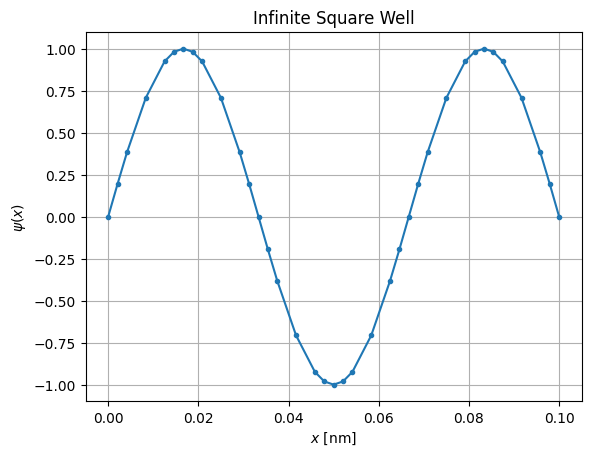

In [ ]:
Eguess = 300  # energy [eV]
M = 5 # number of mesh points in x
x = np.linspace(0, L, M)
y0 = np.array([0,1,-1,1,0])
yp0 = np.gradient(y0)
y = np.vstack((y0, yp0))

sol = solve_bvp(ISW_BVP, bc, x, y, p=[Eguess], tol=1e-3,verbose=1)
#print(sol)
print("The wavefunction at x=L is ",sol.y[0,-1])
print('Energy is =',sol.p[0])

plt.figure()
plt.plot(sol.x, sol.y[0],'.-')
plt.title('Infinite Square Well')
plt.xlabel('$x$ [nm]')
plt.ylabel('$\psi(x)$')

plt.grid()
plt.show()
